103.4301408
103
96.96670344
96


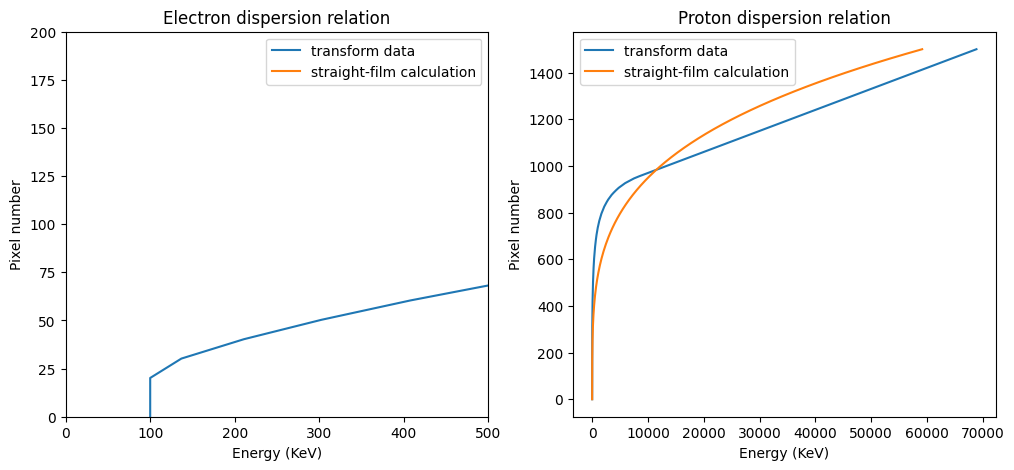

In [47]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

def theoretical_dispersion(x,A,d):
    energy = A*(x**2+d**2)**2
    return energy

def theoretical_dispersion_relativistic_e(x,a,D):
    m = 9.1*10**-31
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

def theoretical_dispersion_relativistic_p(x,a,D):
    m = 1.67*10**-27
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def linear_fit(x,m,c):
    y = m*x+c
    return y

def transform_electron_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_electrons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_electrons[:,1]),np.array(energy_data_electrons[:,0]))

    deltax = energy_data_electrons[-1,1]-energy_data_electrons[-2,1]

    deltaE = energy_data_electrons[-1,0]-energy_data_electrons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_electrons[-1,0] - grad*energy_data_electrons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def transform_proton_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_protons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_protons[:,1]),np.array(energy_data_protons[:,0]))

    deltax = energy_data_protons[-1,1]-energy_data_protons[-2,1]

    deltaE = energy_data_protons[-1,0]-energy_data_protons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_protons[-1,0] - grad*energy_data_protons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def find_index(axis,start,end):
    for i in range(len(axis)):
        if np.abs(axis[i]-start) == np.min(np.abs(axis-start)):
            start_i = i

    for i in range(len(axis)):
        if np.abs(axis[i]-end) == np.min(np.abs(axis-end)):
            end_i = i
    return start_i, end_i


r = 10

x_axis = np.linspace(0,1500,150)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(transform_electron_axis(x_axis,10),x_axis,label='transform data')
axs[0].plot(theoretical_dispersion_relativistic_e((1/10000)*x_axis,0.0,0.008**2),x_axis,label='straight-film calculation')
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_xlim(0,500)
axs[0].set_ylim(0,200)
axs[0].set_ylabel("Pixel number")
axs[0].set_title("Electron dispersion relation")
axs[0].legend()

axs[1].plot(transform_proton_axis(x_axis,10),x_axis,label='transform data')
axs[1].plot(theoretical_dispersion_relativistic_p((1/10000)*x_axis,0.001,0.012**2),x_axis,label='straight-film calculation')
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Pixel number")
axs[1].set_title("Proton dispersion relation")
axs[1].legend()

ther_, pcov_ = curve_fit(theoretical_dispersion, energy_data_electrons[:,1], energy_data_electrons[:,0], p0=[0.0028,5])

energy = theoretical_dispersion((1/10)*x_axis, ther_[0], ther_[1])

#axs[0].plot(energy,x_axis)

96.96670344
96
96.96670344
96
96.96670344
96
96.96670344
96


C:\Users\rayne\AppData\Local\Temp\ipykernel_24040\2775410089.py:30: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)


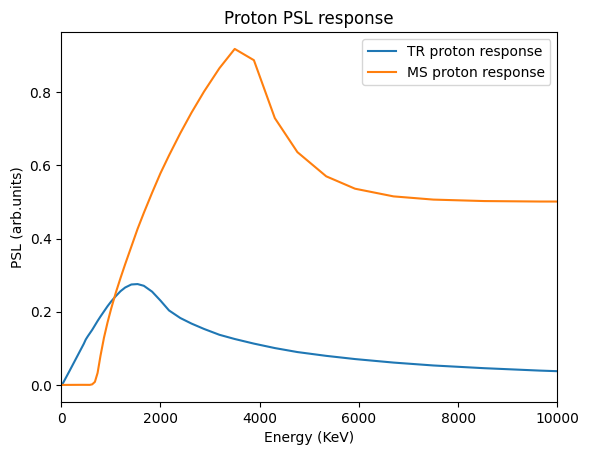

In [2]:
Proton_PSL_data = np.loadtxt('Proton_PSL_linylinx.txt', delimiter=',', skiprows=1)
Proton_PSL_data_low = np.loadtxt('Proton_PSL_low.txt', delimiter=',', skiprows=1)

TR_proton_energy_axis = 1000*Proton_PSL_data[:,0]
TR_proton_PSL_axis = Proton_PSL_data[:,1]

Proton_PSL_data = np.loadtxt('MS_Proton.txt', delimiter=',', skiprows=2)

MS_proton_energy_axis = 1000*Proton_PSL_data[:,0]
MS_proton_PSL_axis = Proton_PSL_data[:,1]

#plt.plot(TR_proton_energy_axis,TR_proton_PSL_axis)

#plt.plot(MS_proton_energy_axis,MS_proton_PSL_axis)

#plt.scatter(TR_proton_energy_axis,TR_proton_PSL_axis)

def find_exp_shift(E, A, a, shift):
    func = (A*np.exp(-a*E))+shift
    return func

def find_poly(E, A, a, shift):
    func = (A*E)**a+shift
    return func

def TR_proton_PSL_scale(Espace):
    PSL = np.interp(Espace,TR_proton_energy_axis,TR_proton_PSL_axis)
    return PSL

coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)

x = np.linspace(0,800,50)

poly_fit_MS = np.poly1d(coefficients)

#plt.plot(x,poly_fit_MS(x))

t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

def MS_proton_PSL_scale(Espace):

    t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

    fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

    PSL = np.zeros(len(Espace))
    start = MS_proton_energy_axis[0]
    end = MS_proton_energy_axis[-1]
    
    for i in range(len(Espace)):
        if np.abs(Espace[i]-start) == np.min(np.abs(Espace-start)):
            start_index = i

    for i in range(len(Espace)):
        if np.abs(Espace[i]-end) == np.min(np.abs(Espace-end)):
            end_index = i

    PSL[start_index:end_index] = np.interp(Espace[start_index:end_index],MS_proton_energy_axis,MS_proton_PSL_axis)
    #PSL[:start_index] = MS_proton_PSL_axis[0]
    PSL[:start_index] = poly_fit_MS(Espace[:start_index])
    PSL[end_index:] = np.interp(Espace[end_index:],np.linspace(4000,10000,100),fit_2)

    return PSL

def find_exp(E, A, a):
    func = (A*np.exp(-a*E))
    return func

def find_2exp(E, A, a, B, b):
    func = func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))
    return func

def find_exp_proton(E, A, a, shift):
    func = (A*np.exp(-a*E))*TR_proton_PSL_scale(E)+shift
    return func

def find_2exp_proton(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*TR_proton_PSL_scale(E)+shift
    return func

def find_temp(E, A, E0, kT):
    func = A*(1/np.sqrt(E))*np.exp((1/kT)*(np.sqrt(E)-np.sqrt(E0))**2)
    return func

##############################################################

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def dxdE_electrons(x_in):
    x_d = np.array(energy_data_electrons[:,1])
    E_d = np.array(energy_data_electrons[:,0])
    dxde_data = np.gradient(x_d,E_d)
    dxde = np.interp(0.1*x_in,x_d,dxde_data)
    return dxde

def dxdE_protons(x_in):
    x_data = np.array(energy_data_protons[:,1])
    E_data = np.array(energy_data_protons[:,0])
    dxde_data = np.gradient(x_data,E_data)
    dxde = np.interp(0.1*x_in,x_data,dxde_data)
    return dxde

plt.plot(transform_proton_axis(x_axis,10), TR_proton_PSL_scale(transform_proton_axis(x_axis,10)), label = 'TR proton response')

plt.plot(transform_proton_axis(x_axis,10), MS_proton_PSL_scale(transform_proton_axis(x_axis,10)), label = 'MS proton response')

#plt.plot(np.linspace(4000,10000,100),find_exp_shift(np.linspace(4000,10000,100), t[0], t[1], t[2]))


#plt.plot(x, fit1)

plt.xlim(0,10000)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("Proton PSL response")
plt.legend()

Text(0.5, 1.0, 'MS Electron PSL response')

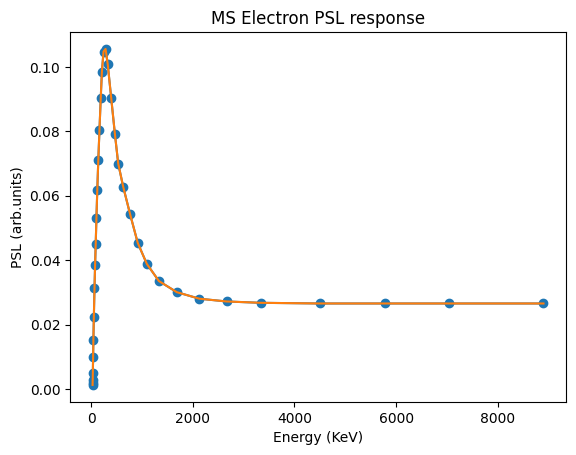

In [3]:
import numpy as np

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)

def MS_PSL_scale(Espace):
    PSL = np.interp(Espace,MS_energy_axis,MS_PSL_axis)
    return PSL

def find_exp_electron(E, A, a, shift):
    func = (A*np.exp(-a*E))*MS_PSL_scale(E)+shift
    return func

def find_2exp_electron(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*MS_PSL_scale(E)+shift
    return func

# Assuming your text file is named 'data.txt' and contains a 2D array
energy_data = np.loadtxt('Electron_Dispersion_Z_vs_Ebeam_0028T.txt', skiprows=8) # Adjust delimiter if needed

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)
plt.scatter(MS_energy_axis,MS_PSL_axis)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("MS Electron PSL response")
#plt.plot(transform_electron_axis(x_axis,10),MS_PSL_scale(transform_electron_axis(x_axis,10)))
#print(np.shape(energy_data[:,0]))
#print(np.shape(MS_energy_axis))
#plt.xlim([0,100000])
#print(np.shape(data))

In [34]:
def gaussian(x, mu, sigma):
  """
  Calculates the Gaussian function.

  Args:
    x: The input value or array.
    mu: The mean of the Gaussian distribution.
    sigma: The standard deviation of the Gaussian distribution.

  Returns:
    The Gaussian function value(s) at the given input(s).
  """
  term1 = 1 / (sigma * np.sqrt(2 * np.pi))
  term2 = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
  return term1 * term2

Temperature in keV =  475
Bulk speed in c =  0.3
1.7073957598879784e-25


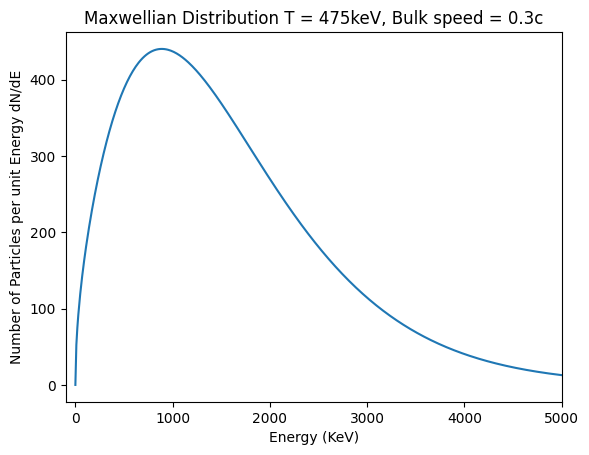

In [26]:
def p_(E):
    c = 3e8
    E_j = E*(1000*(1.6e-19))
    m = 9.11e-31
    p = (1/c)*np.sqrt((E_j**2)-((m**2)*(c**4)))
    return p

def gamma(beta):
    gma = 1/(np.sqrt(1-(beta**2)))
    return gma

def Ep_prime(E,beta):
    c = 3e8
    E_j = E*1000*(1.6e-19)
    m = 9.11e-31
    p = p_(E)
    gma = gamma(beta)
    E_prime = gma*(E_j-(beta*c*p))
    p_prime = gma*(p-((beta*E_j)/c))
    return E_prime, p_prime

def rel_maxwell(E, kT, beta, A):
    c = 3e8
    E_j = E*(1000*(1.6e-19))
    m = 9.11e-31
    p = p_(E)
    gma = gamma(beta)
    E_prime, p_prime = Ep_prime(E,beta)
    #dist = np.exp(-(E_prime/(kT*1000*1.6e-19)))*gma*(1-((beta*p*c)/E_j))*(E_j/(p*c**2))
    dist = np.exp(-(E_prime/(kT*1000*1.6e-19)))*gma*(E_j*p/c-((beta*p**2)))
    area = np.trapz(dist,E)
    dist_renormal = A*dist/area
    return dist_renormal

E = np.linspace(0,8000,800)

#Temp = 900
#Bulk_Speed = 0.05
#Amplitude = 4.5e6

#Temp = 300
#Bulk_Speed = 0.7
#Amplitude = 4.5e6

T = 475
Bulk_Speed = 0.3
Amplitude = 1.0e6

#Temp = 50
#Bulk_Speed = 0.3
#T = ((gamma(Bulk_Speed)*9*9.11e-15)/(1.6e-16))-511
#print(T)
#Amplitude = 1.5e5

dist = rel_maxwell(E+512.4376,T,Bulk_Speed,Amplitude)

plt.plot(E,dist)
#plt.ylim(-100,3000)
plt.xlim(-100,5000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
plt.title('Maxwellian Distribution T = '+str(T)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')

print('Temperature in keV = ', T)
print('Bulk speed in c = ', Bulk_Speed)
print(p_(512.4376))

103.4301408
1034
[0.00000000e+00 1.00066711e+00 2.00133422e+00 ... 1.49799867e+03
 1.49899933e+03 1.50000000e+03]


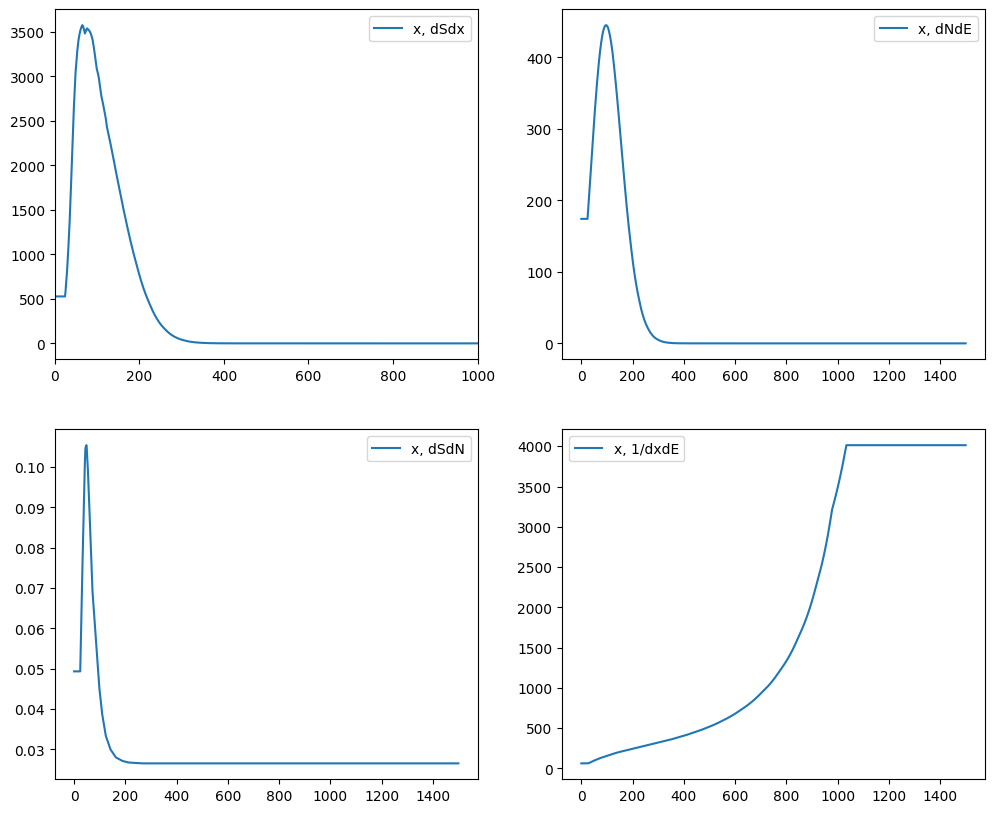

In [30]:
from scipy.ndimage import gaussian_filter
import numpy as np

x_theoretical = np.linspace(0,1500,1500)
E_theoretical = transform_electron_axis(x_theoretical,10)

T = 475
Bulk_Speed = 0.3
Amplitude = 1.0e6

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

dNdE = rel_maxwell(E_theoretical+512.4376,T,Bulk_Speed,Amplitude)
dSdN = MS_PSL_scale(E_theoretical)
axs[1,0].plot(x_theoretical,dSdN, label = "x, dSdN")
#axs[1,0].plot(E_theoretical,dSdN)

dSdE = dNdE*dSdN
dSdx = dSdE/dxdE_electrons(x_theoretical)

axs[0,0].plot(x_theoretical,dSdx, label = "x, dSdx")

axs[0,1].plot(x_theoretical,dNdE, label = "x, dNdE")
#axs[0,1].plot(E_theoretical,dNdE)

axs[1,1].plot(x_theoretical,1/(dxdE_electrons(x_theoretical)), label = "x, 1/dxdE")
#axs[1,1].set_ylim(0,10)
axs[0,0].set_xlim(0,1000)
# Example usage with a 2D array
#filtered_image = gaussian_filter(image, sigma=1)
#print(filtered_image)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

print(x_theoretical)

103.4301408
1034


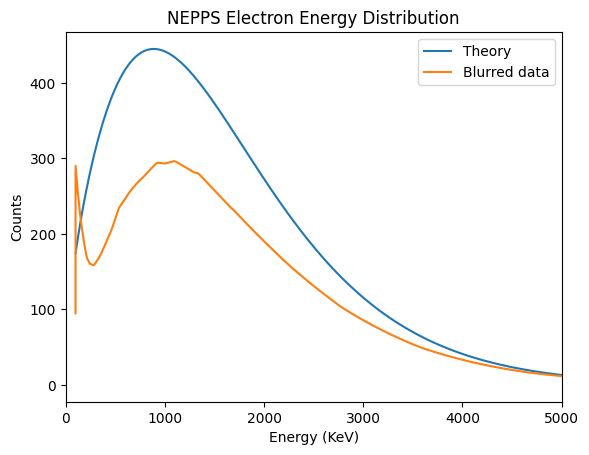

In [43]:
#fig, axs = plt.subplots(1, 2, figsize=(12, 5))

x_theoretical = np.linspace(0,1500,1500)
E_theoretical = transform_electron_axis(x_theoretical,10)

dSdN = MS_PSL_scale(E_theoretical)

chi = 45

slit_function = gaussian(np.linspace(-chi,chi,2*chi),0,chi)

dSdx_ = np.convolve(dSdx,slit_function,mode = 'same')

dSdE_ = dSdx_*dxdE_electrons(x_theoretical)

dNdE_ = dSdE_/dSdN

plt.plot(E_theoretical, dNdE, label='Theory')
plt.plot(E_theoretical, dNdE_, label='Blurred data')
plt.xlim(0,5000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Counts")
plt.title("NEPPS Electron Energy Distribution")
plt.legend()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
96.96670344
11
96.96670344
11


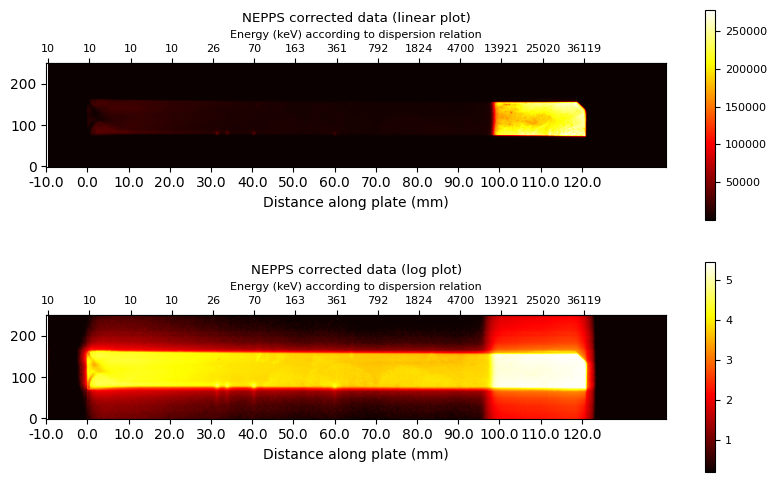

In [ ]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE-1_ALL-SCANS_IP-HDR-ANALYSIS_N241229-001-999.h5', "r") as f:
#with h5py.File('PLATE-5-IP-HDR-ANALYSIS_N241228-001-999.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/HDR_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/HDR_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    plt.rc('font', size=8)

    edge = 95
    #edge = 159
    d = edge - 100

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (mm)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')
    tick = np.arange(0, 1400, step=100)
    axs[0].set_xticks(tick+d, labels=0.1*(tick-100))

    ax0 = axs[0].secondary_xaxis('top')
    ax0.set_xticks(tick, labels=[int(i) for i in transform_proton_axis(tick-95,10)])
    ax0.set_xlabel('Energy (keV) according to dispersion relation')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (mm)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')
    axs[1].set_xticks(tick+d, labels=0.1*(tick-100))

    ax1 = axs[1].secondary_xaxis('top')
    ax1.set_xticks(tick, labels=[int(i) for i in transform_proton_axis(tick-edge,10)])
    ax1.set_xlabel('Energy (keV) according to dispersion relation')

NEPPS_1_29= shot_data
x_1_29_axis = x_axis


items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (3 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (2 members)>), ('PEDIGREE', <HDF5 group "/PEDIGREE" (2 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('HDR_IMAGE', <HDF5 group "/ATTRIBUTES/HDR_IMAGE" (1 members)>), ('SCALE_FACTORS', <HDF5 dataset "SCALE_FACTORS": shape (1,), type "<f8">), ('USED_IMAGE', <HDF5 group "/ATTRIBUTES/USED_IMAGE" (1 members)>)]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
103.4301408
12
103.4301408
12


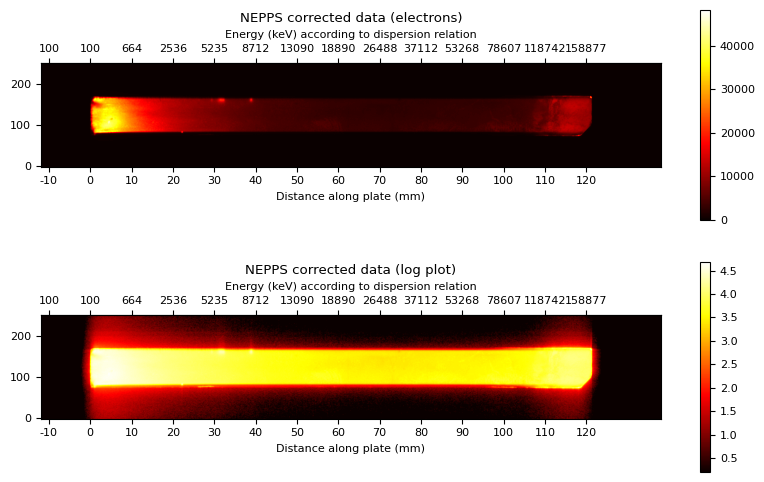

In [ ]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE-2_ALL-SCANS_IP-HDR-ANALYSIS_N241229-001-999.h5', "r") as f:
#with h5py.File('PLATE-1_ALL-SCANS_IP-HDR-ANALYSIS_N241229-001-999.h5', "r") as f:
#with h5py.File('TD_TC000-000_NEPPS_IMAGE-PLATE-6_ALL-SCANS_IP-HDR-ANALYSIS_N241228-001-999.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/HDR_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/HDR_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    plt.rc('font', size=8)

    edge = 119
    #edge = 136
    #edge = 95
    d = edge-100

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (mm)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (electrons)')
    plt.colorbar(im1, ax=axs[0], label='')
    tick = np.arange(0, 1400, step=100)
    axs[0].set_xticks(tick+d, labels=[int(i) for i in 0.1*(tick-100)])

    ax0 = axs[0].secondary_xaxis('top')
    ax0.set_xticks(tick+d, labels=[int(i) for i in transform_electron_axis(tick-119,10)])
    ax0.set_xlabel('Energy (keV) according to dispersion relation')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (mm)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')
    axs[1].set_xticks(tick+d, labels=[int(i) for i in 0.1*(tick-100)])

    ax1 = axs[1].secondary_xaxis('top')
    ax1.set_xticks(tick+d, labels=[int(i) for i in transform_electron_axis(tick-edge,10)])
    ax1.set_xlabel('Energy (keV) according to dispersion relation')

NEPPS_2_29= shot_data
x_2_29_axis = x_axis

103.4301408
1153
-177781.52


Text(0, 0.5, 'Signal (counts)')

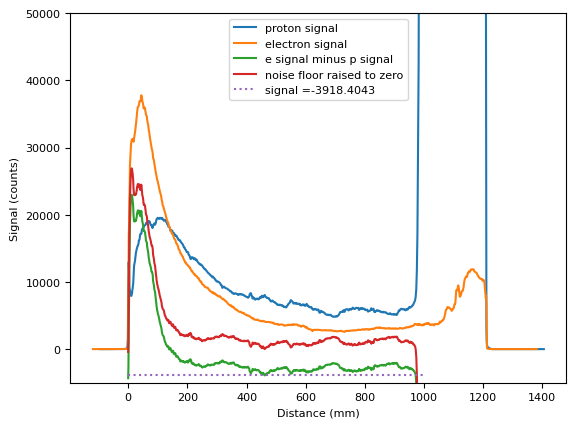

In [ ]:
x = np.linspace(0,1500,1500)
edge = 119
#edge = 159
E = transform_electron_axis(x-edge,10)

dSdN = MS_PSL_scale(E)

line1 = lineout(NEPPS_1_29, 95, 150)
line2 = lineout(NEPPS_2_29, 95, 150)

#dSdx = line-0.8*np.min(line[200:800])
#flat_background = np.mean(line[750:850])
#print(flat_background)

P_E_sub = -line1[95:95+1000]+line2[119:119+1000]

#P_E_sub = -line1[159:159+1000]+line2[136:136+1000]

#P_E_sub = -line1[159:159+1000]+line2[95:95+1000]

print(np.min(P_E_sub))
#plt.plot(x-95,line1, label = 'proton signal')
#plt.plot(x-119,line2, label = 'electron signal')

plt.plot(x-95,line1, label = 'proton signal')
plt.plot(x-119,line2, label = 'electron signal')
plt.plot(np.linspace(0,1000,1000),P_E_sub, label = 'e signal minus p signal')
plt.plot(np.linspace(0,1000,1000),(P_E_sub-np.min(P_E_sub[400:900])), label = 'noise floor raised to zero')
plt.plot(np.linspace(0,1000,1000),0*P_E_sub+np.min(P_E_sub[400:900]), linestyle = 'dotted', label = 'signal ='+str(np.min(P_E_sub[400:900])))
plt.legend()

#plt.plot(x,line-flat_background)
#plt.xlim(115,125) #finding edge
plt.ylim(-5000,50000)
plt.xlabel("Distance (mm)")
plt.ylabel("Signal (counts)")
#plt.title("Electron Scan Lineout")

103.4301408
1153
Temperature in keV =  3333.085913685169


C:\Users\rayne\AppData\Local\Temp\ipykernel_25200\2690732114.py:31: RuntimeWarning: invalid value encountered in log
  coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)


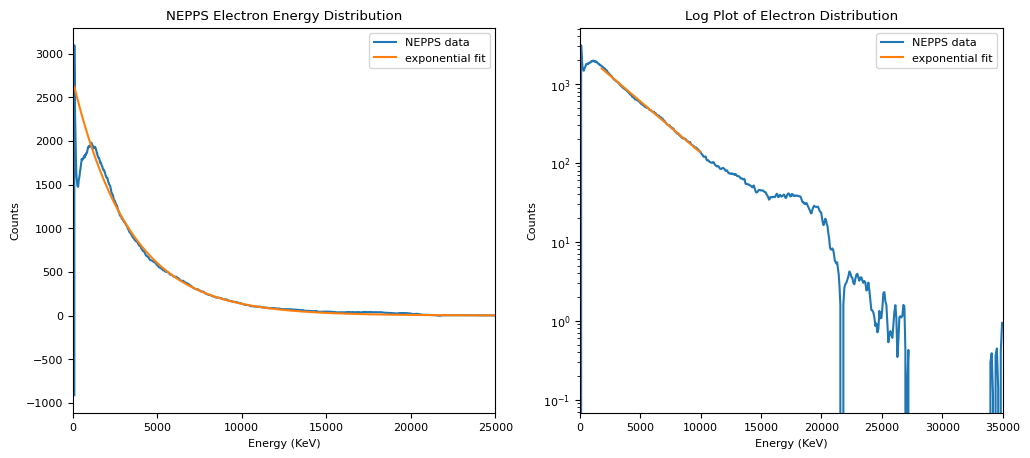

In [ ]:
x = np.linspace(0,1500,1500)
edge = 119
E = transform_electron_axis(x-edge,10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

dSdN = MS_PSL_scale(E)

line = lineout(NEPPS_2_29, 95, 150)

dSdx = line-1*np.mean(line[750:850])

dSdE = dSdx*dxdE_electrons(x)

dNdE = dSdE/dSdN

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,25000)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Electron Energy Distribution")

axs[1].semilogy(E, dNdE, label='NEPPS data')
axs[1].set_xlim(0,50000)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Electron Distribution")

start, end = find_index(E,1800,10000)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], exp_fit[start:end], label='exponential fit')
axs[1].set_xlim(0,35000)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])
#axs[0,0].set_xlim(0,1000)
#axs[0,0].set_ylim(0,60000)
#axs[0,0].set_ylim(0,5000)

Temperature in keV =  380
Bulk speed in c =  0.7


(0.0, 10000.0)

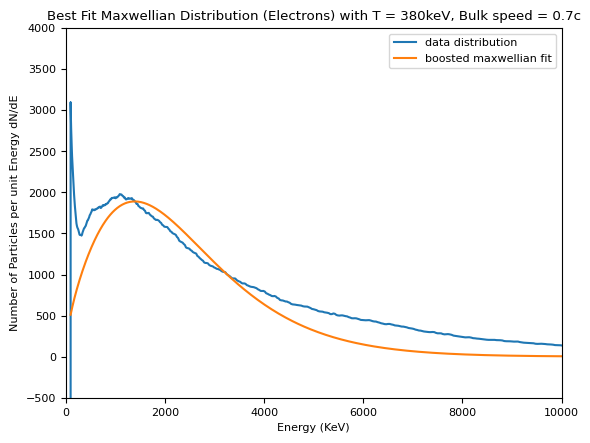

In [ ]:
E_shift = E+511 #add the mass-energy of the electron

Temp = 380
Bulk_Speed = 0.7
Amplitude = 6.2e6

plt.plot(E,dNdE,label = 'data distribution')

plt.plot(E,rel_maxwell(E_shift,Temp,Bulk_Speed,Amplitude), label = 'boosted maxwellian fit')
plt.ylim(-500,4000)
plt.xlim(0,20000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
plt.title('Best Fit Maxwellian Distribution (Electrons) with T = '+str(Temp)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')
plt.legend()
print('Temperature in keV = ', Temp)
print('Bulk speed in c = ', Bulk_Speed)

plt.xlim(0,10000)

292.1383287806623
31.847299794961373
Temperature in keV =  292.1383287806623
Bulk speed in c =  0.77


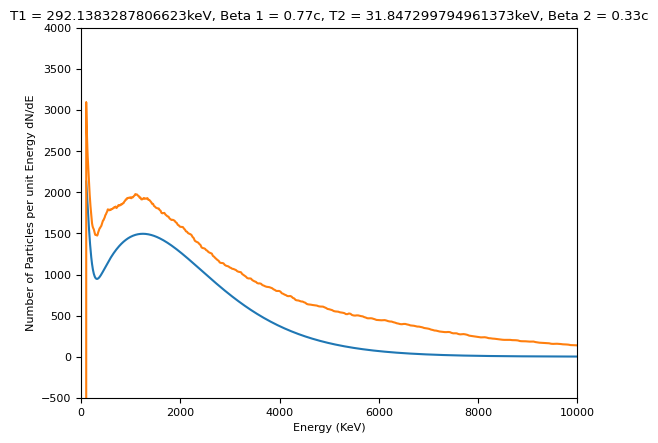

In [ ]:
E_shift = E+511
Bulk_Speed = 0.77
T = ((gamma(Bulk_Speed)*9*9.11e-15)/(1.6e-16))-511
print(T)
Amplitude = 4.4e6

Bulk_Speed1 = 0.33
T1 = ((gamma(Bulk_Speed1)*9*9.11e-15)/(1.6e-16))-511
print(T1)
Amplitude1 = 1.5e5


#double temperature:

#Ta = 60
#beta_a = 0.05
#amp_a = 2.3e5

#Tb = 770
#beta_b = 0.01
#amp_b = 5.2e6

plt.plot(E,rel_maxwell(E_shift,T,Bulk_Speed,Amplitude)+rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
#plt.plot(E,rel_maxwell(E_shift,Ta,beta_a,amp_a)+rel_maxwell(E_shift,Tb,beta_b,amp_b), label = 'boosted maxwellian fit')
#plt.plot(E,rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
plt.plot(E,dNdE,label = 'data distribution')
plt.ylim(-500,4000)
plt.xlim(0,10000)
#plt.xlim(0,1000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
#plt.title('Maxwellian Distribution T = '+str(T)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')
#plt.title('T1 = '+str(Ta)+'keV, Beta 1 = '+str(beta_a)+'c, '+'T2 = '+str(Tb)+'keV, Beta 2 = '+str(beta_b)+'c')
plt.title('T1 = '+str(T)+'keV, Beta 1 = '+str(Bulk_Speed)+'c, '+'T2 = '+str(T1)+'keV, Beta 2 = '+str(Bulk_Speed1)+'c')

print('Temperature in keV = ', T)
print('Bulk speed in c = ', Bulk_Speed)

103.4301408
1153
Temperature in keV =  159.6728693895868


C:\Users\rayne\AppData\Local\Temp\ipykernel_25200\2536888025.py:35: RuntimeWarning: invalid value encountered in log
  coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)


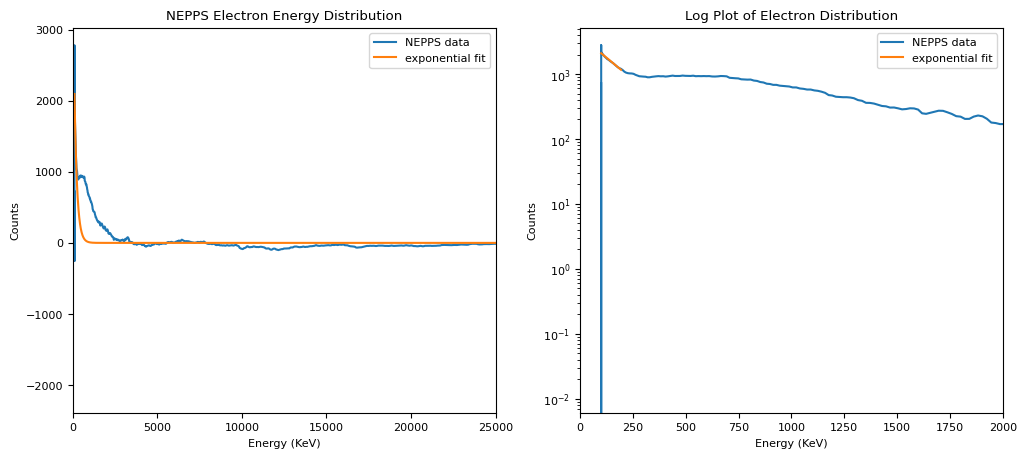

In [ ]:
#Using protons for background subtraction
x = np.linspace(0,1500,1500)
edge = 119
E = transform_electron_axis(x-edge,10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

dSdN = MS_PSL_scale(E)

line_1 = lineout(NEPPS_1_29, 95, 150)
line_2 = lineout(NEPPS_2_29, 95, 150)
line = line_2+0
line[119:119+1200] = line_2[119:119+1200]-line_1[95:95+1200]

dSdx = line-1*np.mean(line[300:400])

dSdE = dSdx*dxdE_electrons(x)

dNdE = dSdE/dSdN

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,25000)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Electron Energy Distribution")

axs[1].semilogy(E, dNdE, label='NEPPS data')
axs[1].set_xlim(0,50000)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Electron Distribution")

start, end = find_index(E,100,200)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], exp_fit[start:end], label='exponential fit')
axs[1].set_xlim(0,2000)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])

Temperature in keV =  240
Bulk speed in c =  0.45


(0.0, 10000.0)

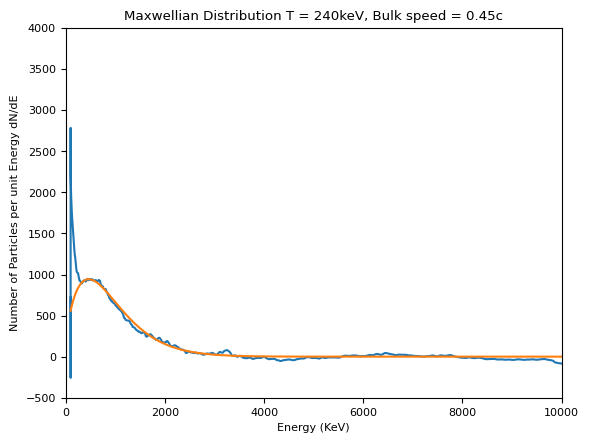

In [ ]:
E_shift = E+511 #add the mass-energy of the electron

Temp = 240
Bulk_Speed = 0.45
Amplitude = 1.2e6

#Temp = 110
#Bulk_Speed = 0.7
#Amplitude = 7.8e5

plt.plot(E,dNdE)

plt.plot(E,rel_maxwell(E_shift,Temp,Bulk_Speed,Amplitude))
plt.ylim(-500,4000)
plt.xlim(0,20000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
plt.title('Maxwellian Distribution T = '+str(Temp)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')

print('Temperature in keV = ', Temp)
print('Bulk speed in c = ', Bulk_Speed)

plt.xlim(0,10000)

292.1383287806623
62.819837165881154
Temperature in keV =  292.1383287806623
Bulk speed in c =  0.77


C:\Users\rayne\AppData\Local\Temp\ipykernel_25200\4268420512.py:26: RuntimeWarning: invalid value encountered in log
  plt.plot(E,np.log(dNdE),label = 'data distribution')


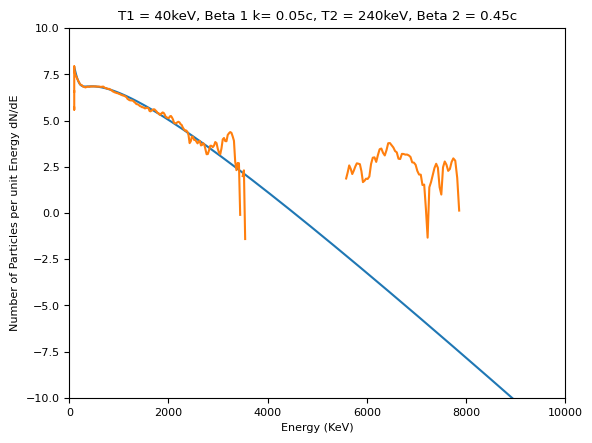

In [ ]:
E_shift = E+511
Bulk_Speed = 0.77
T = ((gamma(Bulk_Speed)*9*9.11e-15)/(1.6e-16))-511
print(T)
Amplitude = 5.5e6

Bulk_Speed1 = 0.45
T1 = ((gamma(Bulk_Speed1)*9*9.11e-15)/(1.6e-16))-511
print(T1)
Amplitude1 = 1.8e5


#double temperature:

Ta = 40
beta_a = 0.05
amp_a = 1.2e5

Tb = 240
beta_b = 0.45
amp_b = 1.2e6

#plt.plot(E,rel_maxwell(E_shift,T,Bulk_Speed,Amplitude)+rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
plt.plot(E,np.log(rel_maxwell(E_shift,Ta,beta_a,amp_a)+rel_maxwell(E_shift,Tb,beta_b,amp_b)), label = 'boosted maxwellian fit')
#plt.plot(E,rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
plt.plot(E,np.log(dNdE),label = 'data distribution')
#plt.ylim(-500,4000)
plt.ylim(-10,10)
plt.xlim(0,10000)
#plt.xlim(0,1000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
#plt.title('Maxwellian Distribution T = '+str(T)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')
plt.title('T1 = '+str(Ta)+'keV, Beta 1 k= '+str(beta_a)+'c, '+'T2 = '+str(Tb)+'keV, Beta 2 = '+str(beta_b)+'c')

print('Temperature in keV = ', T)
print('Bulk speed in c = ', Bulk_Speed)

163.31824337189312
26.180461017688003
Temperature in keV =  163.31824337189312
Bulk speed in c =  0.65


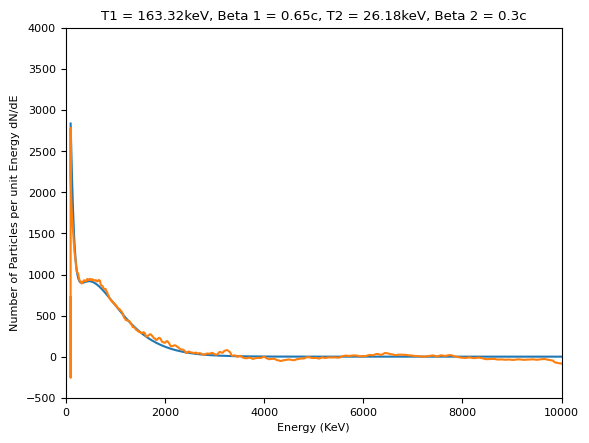

In [ ]:
E_shift = E+511
Bulk_Speed = 0.65
T = ((gamma(Bulk_Speed)*9*9.11e-15)/(1.6e-16))-511
print(T)
Amplitude = 1.1e6

Bulk_Speed1 = 0.30
T1 = ((gamma(Bulk_Speed1)*9*9.11e-15)/(1.6e-16))-511
print(T1)
Amplitude1 = 1.5e5


#double temperature:

#Ta = 60
#beta_a = 0.05
#amp_a = 2.3e5

#Tb = 770
#beta_b = 0.01
#amp_b = 5.2e6

from math import pi

plt.plot(E,rel_maxwell(E_shift,T,Bulk_Speed,Amplitude)+rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
#plt.plot(E,rel_maxwell(E_shift,Ta,beta_a,amp_a)+rel_maxwell(E_shift,Tb,beta_b,amp_b), label = 'boosted maxwellian fit')
#plt.plot(E,rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
plt.plot(E,dNdE,label = 'data distribution')
plt.ylim(-500,4000)
plt.xlim(0,10000)
#plt.xlim(0,1000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
#plt.title('Maxwellian Distribution T = '+str(T)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')
#plt.title('T1 = '+str(Ta)+'keV, Beta 1 = '+str(beta_a)+'c, '+'T2 = '+str(Tb)+'keV, Beta 2 = '+str(beta_b)+'c')
plt.title('T1 = '+str('{0:.2f}'.format(T))+'keV, Beta 1 = '+str(Bulk_Speed)+'c, '+'T2 = '+str('{0:.2f}'.format(T1))+'keV, Beta 2 = '+str(Bulk_Speed1)+'c')

print('Temperature in keV = ', T)
print('Bulk speed in c = ', Bulk_Speed)

165.61206801828473
32
Temperature in keV =  165.61206801828473
Bulk speed in c =  0.653


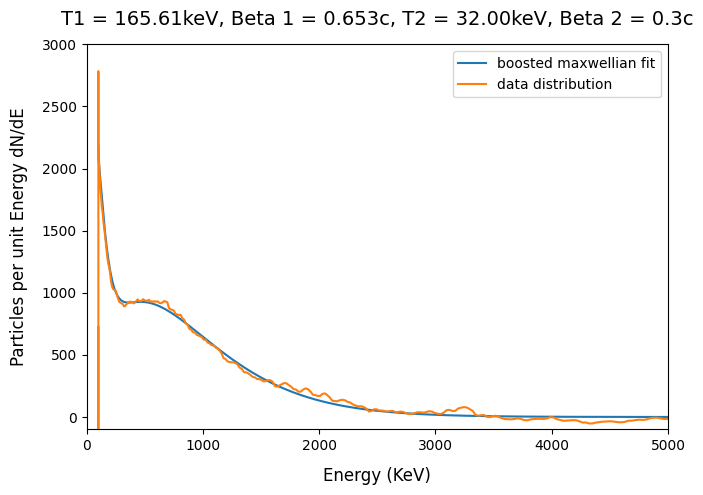

In [ ]:
E_shift = E+511
Bulk_Speed = 0.653
T = ((gamma(Bulk_Speed)*9*9.11e-15)/(1.6e-16))-511
print(T)
#Amplitude = 1.1e6
Amplitude = 1.13e6

#Bulk_Speed1 = 0.30
#T1 = ((gamma(Bulk_Speed1)*9*9.11e-15)/(1.6e-16))-511
#print(T1)
#Amplitude1 = 1.5e5

Bulk_Speed1 = 0.30
T1 = 32
print(T1)
Amplitude1 = 1.3e5

from math import pi

plt.figure(figsize=(7.5,5))
plt.plot(E,rel_maxwell(E_shift,T,Bulk_Speed,Amplitude)+rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
plt.plot(E,dNdE,label = 'data distribution')

#plt.plot(E,np.log10(rel_maxwell(E_shift,T,Bulk_Speed,Amplitude)+rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1)), label = 'boosted maxwellian fit')
#plt.plot(E,np.log10(dNdE),label = 'data distribution')
#plt.ylim(-1,4)
plt.ylim(-100,3000)
plt.xlim(0,5000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Energy (KeV)", fontsize = 12, labelpad = 10)
plt.ylabel("Particles per unit Energy dN/dE", fontsize = 12, labelpad = 10)
#plt.ylabel("log plot", fontsize = 12, labelpad = 8)
plt.title('T1 = '+str('{0:.2f}'.format(T))+'keV, Beta 1 = '+str(Bulk_Speed)+'c, '+'T2 = '+str('{0:.2f}'.format(T1))+'keV, Beta 2 = '+str(Bulk_Speed1)+'c', fontsize = 14, pad = 14)
plt.legend(fontsize = 10)

print('Temperature in keV = ', T)
print('Bulk speed in c = ', Bulk_Speed)

In [ ]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE-6_ALL-SCANS_IP-HDR-ANALYSIS_N241228-001-999.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/HDR_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/HDR_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/HDR_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    plt.rc('font', size=8)

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (mm)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')
    tick = np.arange(0, 1400, step=100)
    axs[0].set_xticks(tick+36, labels=[int(i) for i in 0.1*(tick-100)])

    ax0 = axs[0].secondary_xaxis('top')
    ax0.set_xticks(tick+36, labels=[int(i) for i in transform_electron_axis(tick-136,10)])
    ax0.set_xlabel('Energy (keV) according to dispersion relation')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (mm)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')
    axs[1].set_xticks(tick+36, labels=[int(i) for i in 0.1*(tick-100)])

    ax1 = axs[1].secondary_xaxis('top')
    ax1.set_xticks(tick+36, labels=[int(i) for i in transform_electron_axis(tick-136,10)])
    ax1.set_xlabel('Energy (keV) according to dispersion relation')

NEPPS_6_28= shot_data
x_6_28_axis = x_axis

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'PLATE-6_ALL-SCANS_IP-HDR-ANALYSIS_N241228-001-999.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

103.4301408
1170


Text(0.5, 1.0, 'Electron Scan Lineout')

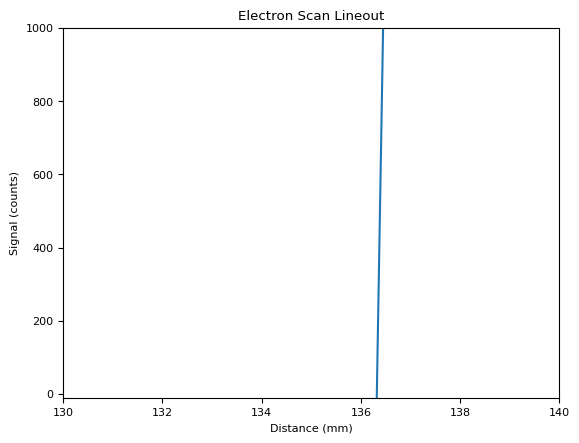

In [ ]:
x = np.linspace(0,1500,1500)
edge = 136
E = transform_electron_axis(x-edge,10)

dSdN = MS_PSL_scale(E)

line = lineout(NEPPS_6_28, 95, 150)

dSdx = line-0.8*np.min(line[200:800])
flat_background = np.mean(line[750:850])

#plt.plot(x,line)
plt.plot(x,line-flat_background)
plt.xlim(130,140) #finding edge
plt.ylim(-10,1000)
plt.xlabel("Distance (mm)")
plt.ylabel("Signal (counts)")
plt.title("Electron Scan Lineout")

103.4301408
1170
Temperature in keV =  3122.4112204274625


C:\Users\rayne\AppData\Local\Temp\ipykernel_9400\1366210946.py:32: RuntimeWarning: invalid value encountered in log
  coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)


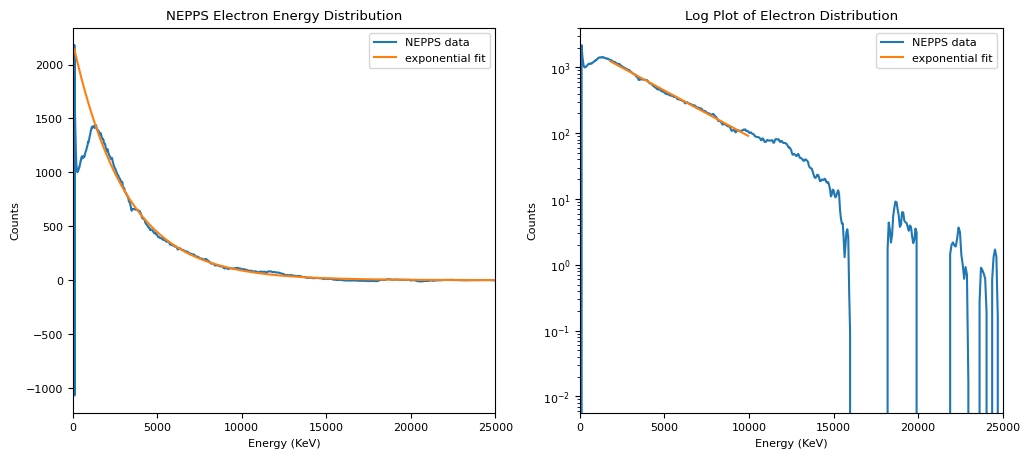

In [ ]:
x = np.linspace(0,1500,1500)
edge = 136
E = transform_electron_axis(x-edge,10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

dSdN = MS_PSL_scale(E)

line = lineout(NEPPS_6_28, 95, 150)

#dSdx = line-1*np.min(line[200:800])
dSdx = line-1*np.mean(line[750:850])

dSdE = dSdx*dxdE_electrons(x)

dNdE = dSdE/dSdN

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,25000)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Electron Energy Distribution")

axs[1].semilogy(E, dNdE, label='NEPPS data')
axs[1].set_xlim(0,50000)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Electron Distribution")

start, end = find_index(E,1800,10000)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], exp_fit[start:end], label='exponential fit')
axs[1].set_xlim(0,25000)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])


Temperature in keV =  350
Bulk speed in c =  0.7


(0.0, 10000.0)

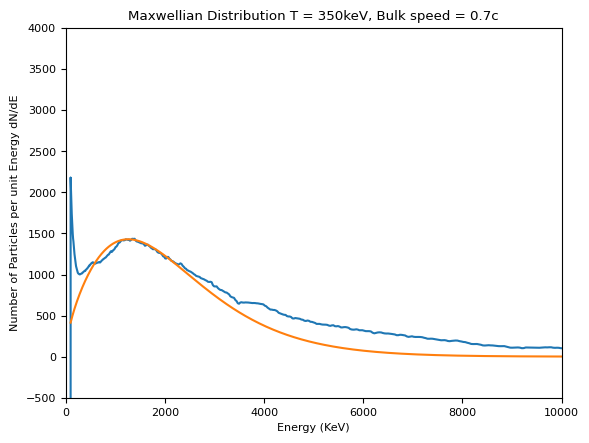

In [ ]:
E_shift = E+511 #add the mass-energy of the electron

Temp = 350
Bulk_Speed = 0.7
Amplitude = 4.3e6

plt.plot(E,dNdE)

plt.plot(E,rel_maxwell(E_shift,Temp,Bulk_Speed,Amplitude))
plt.ylim(-500,4000)
plt.xlim(0,20000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
plt.title('Maxwellian Distribution T = '+str(Temp)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')

print('Temperature in keV = ', Temp)
print('Bulk speed in c = ', Bulk_Speed)

plt.xlim(0,10000)

Temperature in keV =  950
Bulk speed in c =  0.0


(0.0, 10000.0)

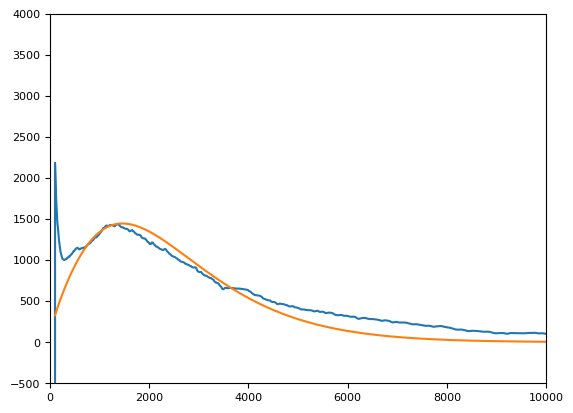

In [ ]:
E_shift = E+511 #add the mass-energy of the electron

Temp = 950
Bulk_Speed = 0.0
Amplitude = 4.9e6

plt.plot(E,dNdE)

plt.plot(E,rel_maxwell(E_shift,Temp,Bulk_Speed,Amplitude))
plt.ylim(-500,4000)
plt.xlim(0,20000)

print('Temperature in keV = ', Temp)
print('Bulk speed in c = ', Bulk_Speed)

plt.xlim(0,10000)

292.1383287806623
31.847299794961373
Temperature in keV =  292.1383287806623
Bulk speed in c =  0.77


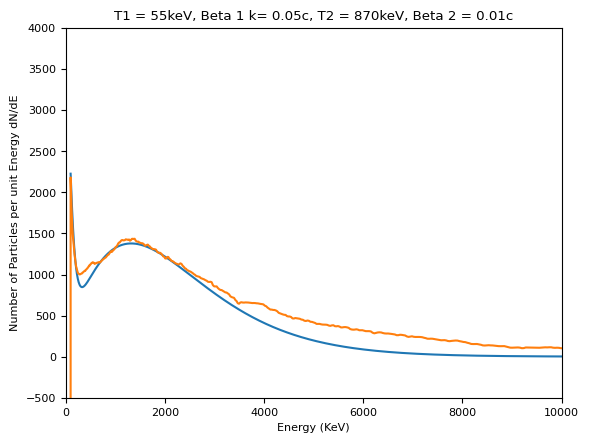

In [ ]:
E_shift = E+511
Bulk_Speed = 0.77
T = ((gamma(Bulk_Speed)*9*9.11e-15)/(1.6e-16))-511
print(T)
Amplitude = 5.5e6

Bulk_Speed1 = 0.33
T1 = ((gamma(Bulk_Speed1)*9*9.11e-15)/(1.6e-16))-511
print(T1)
Amplitude1 = 1.8e5


#double temperature:

Ta = 55
beta_a = 0.05
amp_a = 1.6e5

Tb = 870
beta_b = 0.01
amp_b = 4.3e6

#plt.plot(E,rel_maxwell(E_shift,T,Bulk_Speed,Amplitude)+rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
plt.plot(E,rel_maxwell(E_shift,Ta,beta_a,amp_a)+rel_maxwell(E_shift,Tb,beta_b,amp_b), label = 'boosted maxwellian fit')
#plt.plot(E,rel_maxwell(E_shift,T1,Bulk_Speed1,Amplitude1), label = 'boosted maxwellian fit')
plt.plot(E,dNdE,label = 'data distribution')
plt.ylim(-500,4000)
plt.xlim(0,10000)
#plt.xlim(0,1000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
#plt.title('Maxwellian Distribution T = '+str(T)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')
plt.title('T1 = '+str(Ta)+'keV, Beta 1 k= '+str(beta_a)+'c, '+'T2 = '+str(Tb)+'keV, Beta 2 = '+str(beta_b)+'c')

print('Temperature in keV = ', T)
print('Bulk speed in c = ', Bulk_Speed)